# DSCI 100: Final Project Title


By: Arshia, James, Lily, and Raina

### 1.0 Introduction

The Pacific Laboratory for Artificial Intelligence (PLAI), led by Professor Frank Wood from the Department of Computer Science at UBC, developed a Minecraft server built to observe and collect detailed player data. Every action a player performs in the game is systematically recorded. This data provides insight into how players interact with the Minecraft game, allowing researchers to study patterns and engagement levels.

By analyzing these patterns, our team aims to understand how different player characteristics contribute to players' playtime and engagement. This research aims to help refine Minecraft recruitment strategies and ensure that resources including server capacity and software infrastructure are efficiently allocated. Our project contributes to this effort by examining player data to identify meaningful trends and relationships within the dataset.

To support the PLAI research group in targeting recruitment efforts more effectively, we aim to identify what kinds of players are most likely to generate large amounts of data through extended gameplay. Specifically: 
**Can player experience level and age predict the number of hours that players spend playing Minecraft?**

We choose to focus on two specific factors, experience level and age from the players.csv dataset, to predict the number of hours players spend playing Minecraft.
 
**Summary of players.csv dataset:**


Observation Numbers = 196 Variable Numbers = 7
|Name|Type|Variables Definiton|
|----|----|----|
|Experience|factor|Players experience level|
|Subscribe|logical|Subscription status|
|hashedEmail|character|Encrypted players emails|
|played_hours|numeric| Time played minecraft |
|Name|character|Players name|
|Gender|factor|Players gender|
|Age| numeric|Players age|

# 2.0 Methods and Results

We first started by downloading a few necessary packages for our analysis including tidyverse, tidymodels, and repr. 

In [17]:
library(repr)
library(tidyverse)
library(tidymodels)
set.seed(1)
options(repr.matrix.max.rows = 10)

### 2.1 Load in data

Then we loaded the Minecraft player data from a URL directly into R using `read_csv` and stored it as a variable called players_data to visualize the resulting dataset. 

In [18]:
players_data<-read_csv("https://raw.githubusercontent.com/lilypurdy/toy_ds_project/refs/heads/main/players%20(2).csv")
head(players_data, 5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


### 2.2 Wrangle and Clean Data

To wrangle and clean the data, we re-read the data with `read_csv` then used `col_names` to change the column names to more readable titles: experience, subscribed, hashed_email, hours_played, name, and gender. `col_names` is used to specify the expected type of data that is in each column which ensures that each column is interpreted correctly and prevents any mismatched reading issues when the data is read into R. 

In [19]:
clean_players_data <- read_csv("https://raw.githubusercontent.com/Jamesnam1/toy_ds_project/refs/heads/main/players.csv",
    col_names = c("experience", "subscribed", "hashed_email", "hours_played", "name", "gender", "age"),
                col_types = list("c", "l", "c", "d", "c", "c", "i"))
head(clean_players_data)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


experience,subscribed,hashed_email,hours_played,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
experience,NA,hashedEmail,NA,name,gender,NA
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


Next the `select()` function is used to remove the columns that aren’t needed for our data analysis: hashed_email, subscribed, name, and gender. With the `filter()` function, we filtered out all the rows where age had a missing value and removed players who played less than 0.1 hours of Minecraft per week, to exclude all inactive players' accounts from our analysis. Finally, the wrangled and cleaned dataset was assigned to the name "players" and the first 5 rows were viewed. 

In [20]:
players <- clean_players_data |> select(-hashed_email, -subscribed, -name, -gender) |>
filter(age!= "NA") |>
filter(hours_played >0.1)
head(players, 5)

experience,hours_played,age
<chr>,<dbl>,<int>
Pro,30.3,9
Veteran,3.8,17
Amateur,0.7,21
Veteran,1.6,23
Beginner,1.5,25


### 2.3 Summarize Data

The next step we did was calculate the mean values of the quantitative variables of interest: played_hours and age. The summary statistics were generated through the `summarise()` function with `na.rm = TRUE` used to ignore any missing values in the data. The resulting "mean_values" were viewed in a tibble, with the mean playing hours being 15.03 hours and mean age being 20.47 years. Summarizing the data set offers insight into general trends of the data, specifically the "average" Minecraft player for our targeting purposes. 

In [8]:
mean_values <- players |> summarise(
    mean_played_hours = mean(hours_played, na.rm = TRUE),
    mean_age = mean(age, na.rm = TRUE))

mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
15.02895,20.47368


### 2.4 Visualization

Visualizations were then created to visually see the relationship within the data between the explanatory variables (experience and age) and the response variable (played hours). The focus is understanding how player experience and age correlate with the amount of hours spent playing Minecraft for recruitment focus to increase game engagement. 

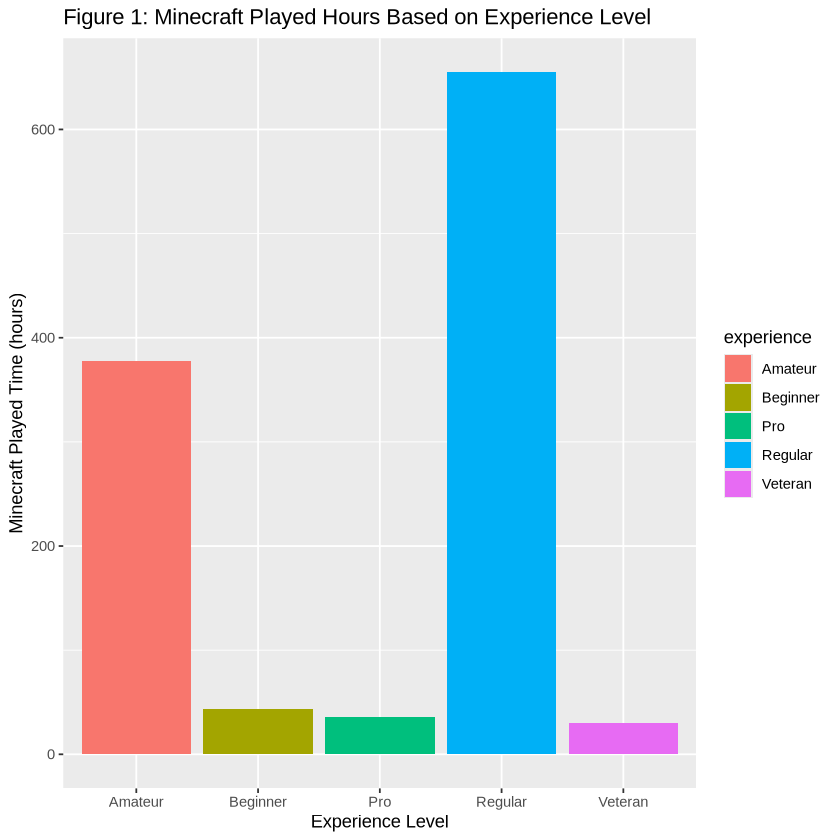

In [21]:
ggplot(players, aes(x = experience, y = hours_played, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Experience Level", x = "Experience Level", y = "Minecraft Played Time (hours)")


To compare the Minecraft playtime across the five different experience levels, a bar plot was created with the `ggplot()` and `geom_bar()` functions. This graph shows that Regular and Amateur experience level players contribute significantly more playtime hours compared to the other three experience levels of Beginner, Pro, and Veteran. This insight is useful for targeting our recruitment and marketing efforts catered to players' experince levels to boost game interaction. 

`geom_smooth()` using formula = 'y ~ x'


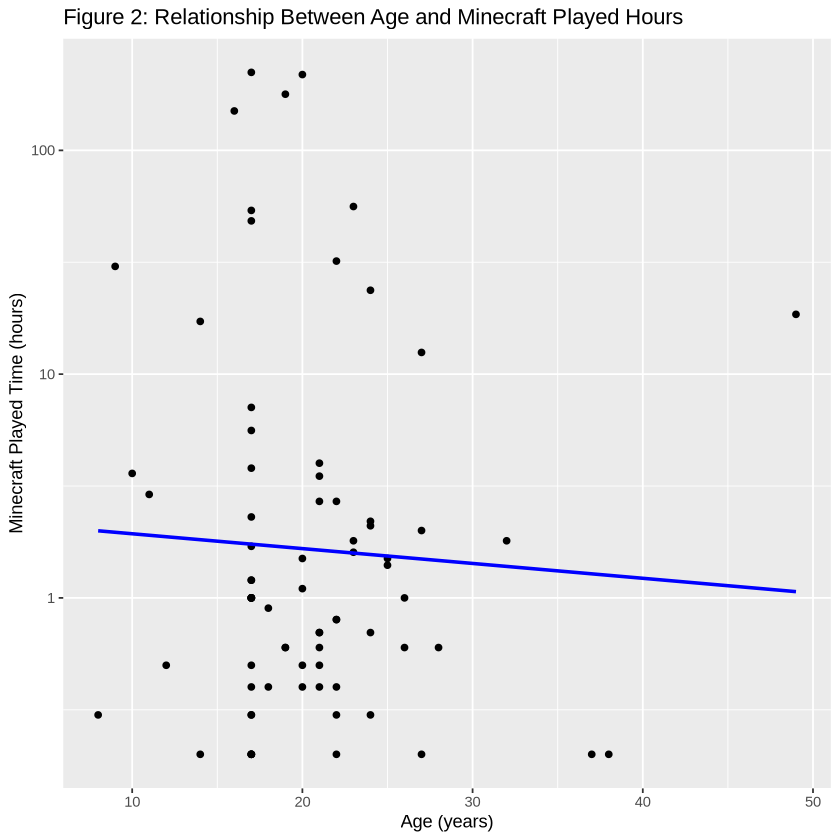

In [22]:
ggplot(players, aes(x = age, y = hours_played)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(title = "Figure 2: Relationship Between Age and Minecraft Played Hours", 
         x = "Age (years)", 
         y = "Minecraft Played Time (hours)") +
        scale_y_log10(labels = label_comma())


The second visualization is a scatter plot exploring the relationship between the age of players and the number of Minecraft hours played, created with the `ggplot()` and `geom_point()` functions to display each individual data point. To highlight the overall pattern, a trendline is added with the `geom_smooth()` function, showing a slight negative relationship between age and playtime, as age increases the number of played hours decreases. Indicating that younger players generally play more hours than older players. To better visualize this relationship without being overshadowed by the presence of a few significant outliers, the y-axis is logarithmically scaled using the function `scale_y_log10()`. The plot reveals most players of all ages tend to play less than ten hours per week, with a few high outliers. 

Overall, these visualizations suggest that players between the ages of 15-25 and players with Regular and Amateur experience levels, are the most highly engaged player base. Therefore, focusing recruitment and engagement efforts on younger and moderately experienced players would be the most effective strategy to boost game interaction, as they have the highest activity and potential for increased involvement. 

## 2.5 Splitting Data

In [23]:
#set the training data to 75 percent of the overall percentage
set.seed(1)

split_data <- initial_split(players, prop = 3/4, strata = hours_played)

training_data <- training(split_data)
testing_data <- testing(split_data)

head(training_data)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


experience,hours_played,age
<chr>,<dbl>,<int>
Amateur,0.2,22
Amateur,0.5,17
Regular,0.3,8
Regular,0.6,28
Beginner,0.6,26
Veteran,0.4,20


## 2.6 Performing Data Analysis:

In order to predict the "hours_played" using "Age" and "experience", we chose to build a linear regression model to find the correlation between "hours_played" and "Age", and "hours_played" "experience." The first step is to set up the recipe equation to determine the independent variable, dependent variable, and the range of data to be selected. Then I choose `linear_reg()` in linear regression to complete the specialization, and then build the model through `workflow()`. Finally, `ggplot`is used to help linear regression to achieve visualization, so that the relationship between the two can be observed from the image in a more simple and clear way.

### Building model & Visualization (Age & Hours_Played - Training Data)

# Discussion